In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [83]:
def pca_test(image_dir, pca_components = 50):
    temp_dir = image_dir
    img = cv2.cvtColor(cv2.imread(temp_dir), cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(img)
    r, g, b = r / 255, g / 255, b / 255

    pca_r = PCA(n_components = pca_components)
    reduced_r = pca_r.fit_transform(r)

    pca_g = PCA(n_components = pca_components)
    reduced_g = pca_g.fit_transform(g)

    pca_b = PCA(n_components = pca_components)
    reduced_b = pca_b.fit_transform(b)

    print(f"Red Channel  : {sum(pca_r.explained_variance_ratio_)}")
    print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
    print(f"Blue Channel : {sum(pca_b.explained_variance_ratio_)}")

    print(reduced_r.shape)
    print(reduced_g.shape)
    print(reduced_b.shape)

    fig = plt.figure(figsize = (10, 2)) 
    fig.add_subplot(131)
    plt.title("Red Channel")
    plt.ylabel('Variation explained')
    plt.xlabel('Eigen Value')
    plt.bar(list(range(1,pca_components+1)),pca_r.explained_variance_ratio_)
    fig.add_subplot(132)
    plt.title("Green Channel")
    plt.xlabel('Eigen Value')
    plt.bar(list(range(1,pca_components+1)),pca_g.explained_variance_ratio_)
    fig.add_subplot(133)
    plt.title("Blue Channel")
    plt.xlabel('Eigen Value')
    plt.bar(list(range(1,pca_components+1)),pca_b.explained_variance_ratio_)
    plt.show()

    reconstructed_r = pca_r.inverse_transform(reduced_r)
    reconstructed_g = pca_g.inverse_transform(reduced_g)
    reconstructed_b = pca_b.inverse_transform(reduced_b)

    img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))
    img_reconstructed = (img_reconstructed * 255).astype(np.uint8)

    fig2 = plt.figure(figsize = (15, 2)) 
    fig2.add_subplot(121)
    plt.imshow(img)
    fig2.add_subplot(111)
    plt.imshow(img_reconstructed)

    plt.imsave('pca-test.jpg', img_reconstructed)

Red Channel  : 0.98610090808132
Green Channel: 0.9883381637043711
Blue Channel : 0.9847086808402125
(450, 50)
(450, 50)
(450, 50)


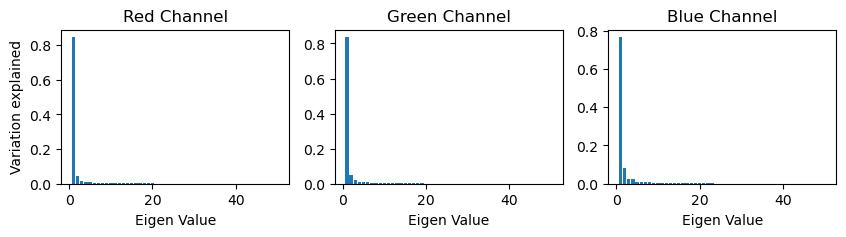

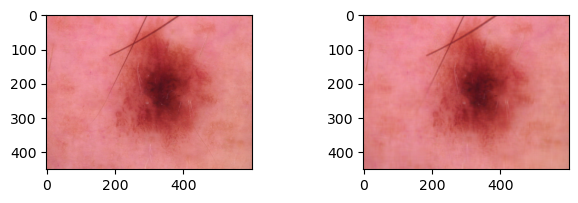

In [88]:
# Test for one image
pca_test('dataverse_files/HAM10000_images/ISIC_0024306.jpg', pca_components = 50)

In [73]:
def img_pca(img_name, pca_components, input_dir, output_dir):
    
    temp_dir = input_dir + img_name
    
    img = cv2.cvtColor(cv2.imread(temp_dir), cv2.COLOR_BGR2RGB)
    r, g, b = cv2.split(img)
    r, g, b = r / 255, g / 255, b / 255

    pca_r = PCA(n_components = pca_components)
    reduced_r = pca_r.fit_transform(r)
    pca_g = PCA(n_components = pca_components)
    reduced_g = pca_g.fit_transform(g)
    pca_b = PCA(n_components = pca_components)
    reduced_b = pca_b.fit_transform(b)

    reconstructed_r = pca_r.inverse_transform(reduced_r)
    reconstructed_g = pca_g.inverse_transform(reduced_g)
    reconstructed_b = pca_b.inverse_transform(reduced_b)

    img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))
    img_reconstructed = img_reconstructed * 255
    img_reconstructed = img_reconstructed.astype(np.uint8)

    output_image = output_dir + img_name
    plt.imsave(output_image, img_reconstructed)

In [75]:
metadata = pd.read_csv('dataverse_files/HAM10000_metadata.csv')
img_list = metadata['image_id'].tolist()

input_dir = 'dataverse_files/HAM10000_images/' # this is the folder with all the images
output_dir = 'dataverse_files/HAM10000_images_pca/' # create this folder first

# this for loop will take a while to run ( around 30 mins )

'''
for image in img_list: # this will take a while to run like 30 mins
    img_dir = image + '.jpg'
    img_pca(img_dir, 50, input_dir, output_dir)
'''
